# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [2]:
## 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib를 인라인 환경에서 사용하겠다고 이야기 해주는것
%matplotlib inline

In [3]:
## 데이터 불러오기

titanic_df = pd.read_csv('./titanic/train.csv')
titanic_df         

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1. 분석의 목적과 변수 확인
* 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [3]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## 각각 column의 데이터 타입 확인하기

titanic_df.dtypes

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. 데이터 전체적으로 살펴보기

In [5]:
## 데이터 전체 정보를 얻는함수 : .describe()
## describe()의 경우에는 수치형 데이터에 대한 요약만을 얻을수있다. 

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 상관계수 확인!

titanic_df.corr()
# Correlation is NOT Causation

# 상관성과 인과성을 구분해야한다. -> 상관관계가 높게 나왔다고 해서 인과성이 있다고 단정지을수 없다.

# 상관성 : A up, B up, ...
# 인과성 : A -> B

C:\Users\User\AppData\Local\Temp\ipykernel_21520\2417187009.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
## 결측치 확인 -> isnull()을 사용해서 null이면 True, 결측값이 아니면 False를 리턴한다.

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### 1. Survived Column

In [8]:
## 생존자, 사망자 명수는?

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

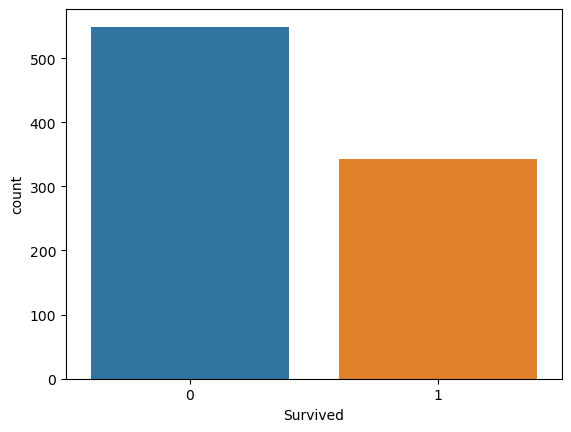

In [13]:
## 생존자수와 사망자수를 BarPlot으로 그려보기 sns.countplot()
## seaborn이 matplotlib보다 기본적으로 코드를 좀더 깔끔하게 작성해준디.

sns.countplot(x = 'Survived', data = titanic_df)
plt.show()

### 2. Pclass

In [16]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [18]:
# 생존자 인원?
# 생존자는 1이므로 sum()을 하면 결국 생존자 수만 체크가능

titanic_df[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [20]:
# 전체 인원대비 생존자 비율(참고로 pclass 1이 제일 좋은 좌석이다)

titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

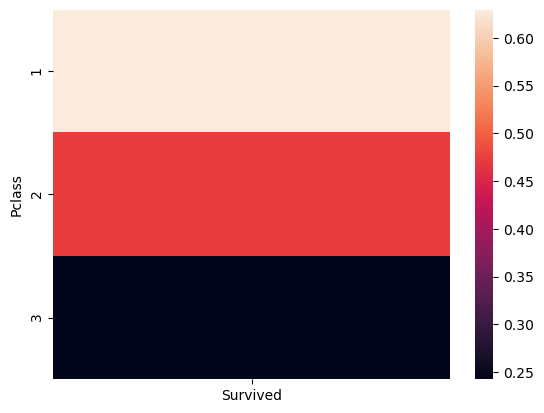

In [21]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.plot()

### 3. Sex

In [22]:
titanic_df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [25]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

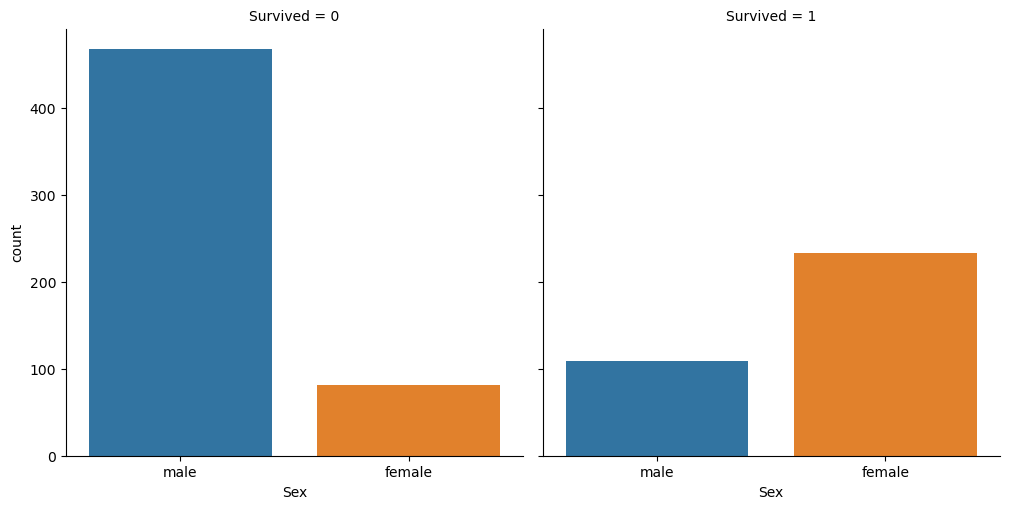

In [27]:
# sns.catplot
# 인사이트: 남성보다 여성이 살아남은 수가 더 많다.

sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = titanic_df)
plt.show()

### 4. Age

remind:결측치 존재!

In [29]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

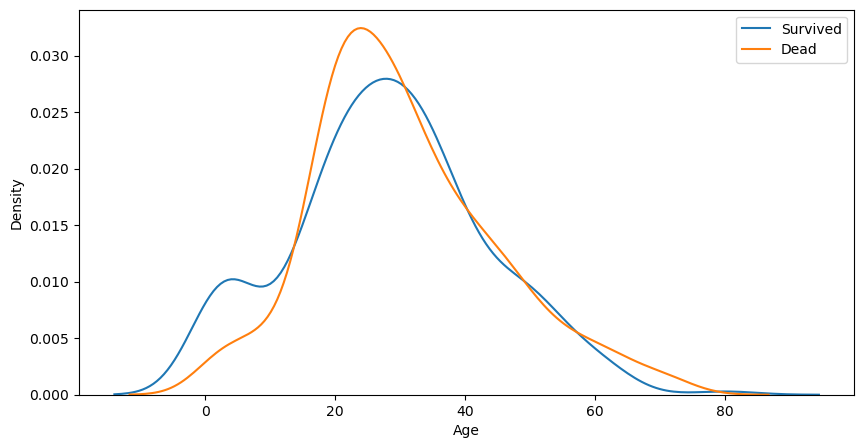

In [32]:
## Survived 1, 0과 Age의 경향성을 확인해보자

# plot을 그리기 위한 figure이 있는대 figure은 어떤 그래프에 대한 도면이고 
# axis는 figure안에있는 x축, y축 틀을 말하고 틀 위에 plot이 그려지는 구조이다.

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x = titanic_df[titanic_df['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(x = titanic_df[titanic_df['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.show()
# 그래프를 보면 어린아이의 경우 살아남은 사람의 비율(밀도)가 죽은 사람보다 더 많은 것을 볼 수있다.

### Apeendix Sex + Pclass vs Survived

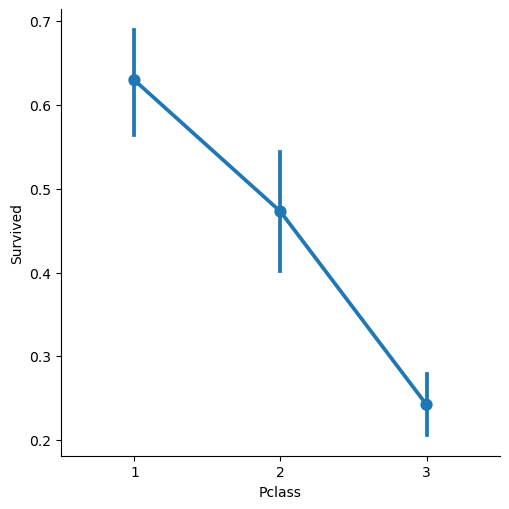

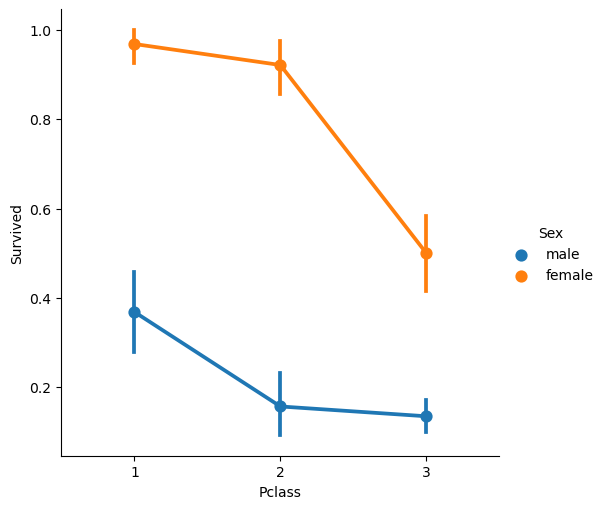

In [35]:
sns.catplot(x = 'Pclass', y='Survived', kind = 'point', data = titanic_df)
plt.show()
# 이렇게 point 그래프를 그릴 수 있는대 point 그래프의 경우 각각의 Pclass별 Survived에 대한 추정치를 보여준다.
# 점이 추정치를 의미하고 점 주위에 막대기가 하나씩 있는대 이게 바로 신뢰구간을 말한다. 
# 추정치를 꺾은선 그래프로 나타낼 수있다. 여기서보면 Pclass가 1일수록 살아남을 가능성이 높았다.
# 여기서 hue라는 인자를 더 넣어보자

sns.catplot(x = 'Pclass', y='Survived', kind = 'point', hue = 'Sex', data = titanic_df)
plt.show()
# hue라고 하는것은 다른 범주형 변수로 나눌수 있는 키워드이다.
# 여기서는 성별로 나눠보자
# 그럼 그래프가 2개로 쪼개진다 그럼 여기서 알수있는 사실은  Pclass가 0,1면서 여성이였던 사람들은 
# Survived에 대한 추정치가 거의 1에 가까운것을 알 수있다.
# 그래서 단일 컬럼에 대한 분석도 중요하지만 여러컬럼을 가지고 같이 분석하는 것도 중요하다는 사실을
# 알 수있다.

### Apeendix Age vs Pclass

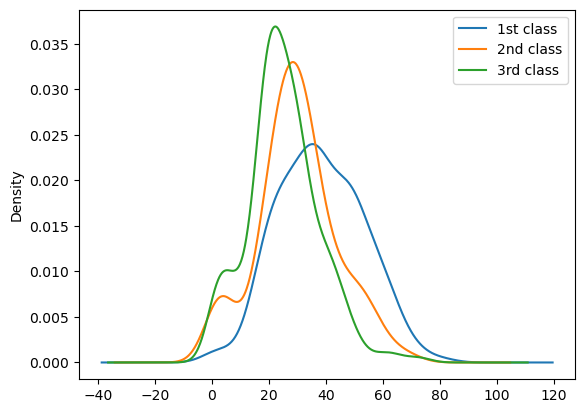

In [44]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind = 'kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind = 'kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind = 'kde')

plt.legend(['1st class','2nd class','3rd class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 Survived와 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? SibSp? Parch?


In [9]:
titanic_df[['SibSp','Survived']].groupby(['SibSp']).mean()

# 형제자매가 1명 있는경우가 없는경우(0)보다 더 생존한 사람이 많았음을 확인할 수있음 

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [16]:
titanic_df[['SibSp']].value_counts()

SibSp
0        608
1        209
2         28
4         18
3         16
8          7
5          5
dtype: int64

[]

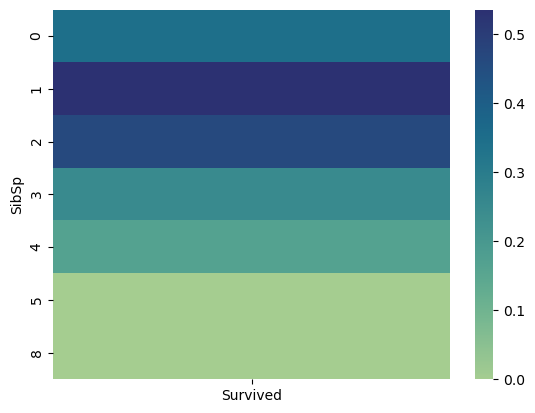

In [14]:
sns.heatmap(titanic_df[['SibSp','Survived']].groupby(['SibSp']).mean(),cmap="crest")
plt.plot()

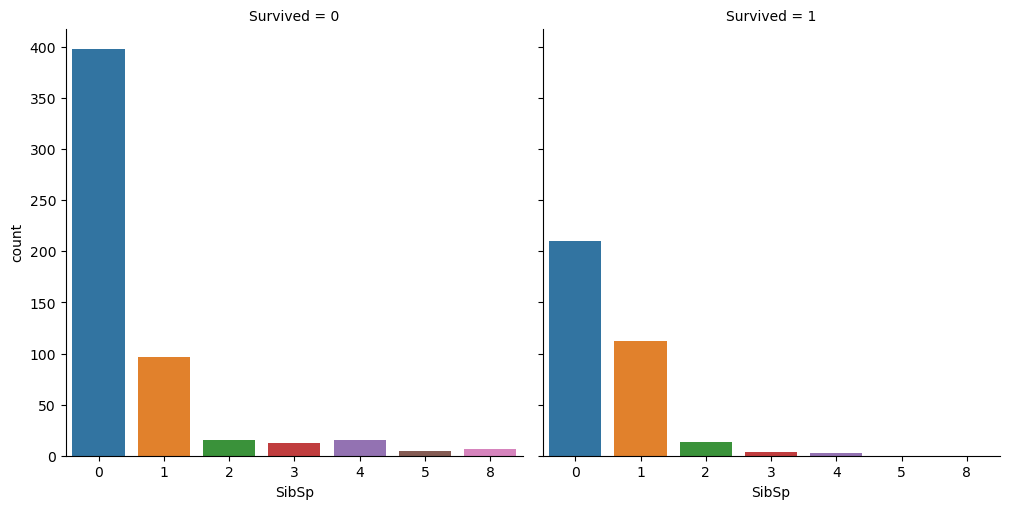

In [5]:
sns.catplot(x = 'SibSp', col = 'Survived', kind = 'count', data = titanic_df)
plt.show()

# 생존하지 못한 사람들중에 형재자매가 1명있는 사람의 비율보다 
# 생존한 사람중 형제자매가 1명 있는 사람의 비율이 높은것으로 보아
# 형제자매가 있을 수록 상관관계가 높은것은 알수있다.(1명인 부분만 봤을떄)
# 나머지 2명 이상부터는 큰 차이가 나지 않지만 이것은 내 생각에는 표본이 적어 유의미한 인사이트라고는 볼 수없을 거같다.

In [10]:
titanic_df[['Parch','Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


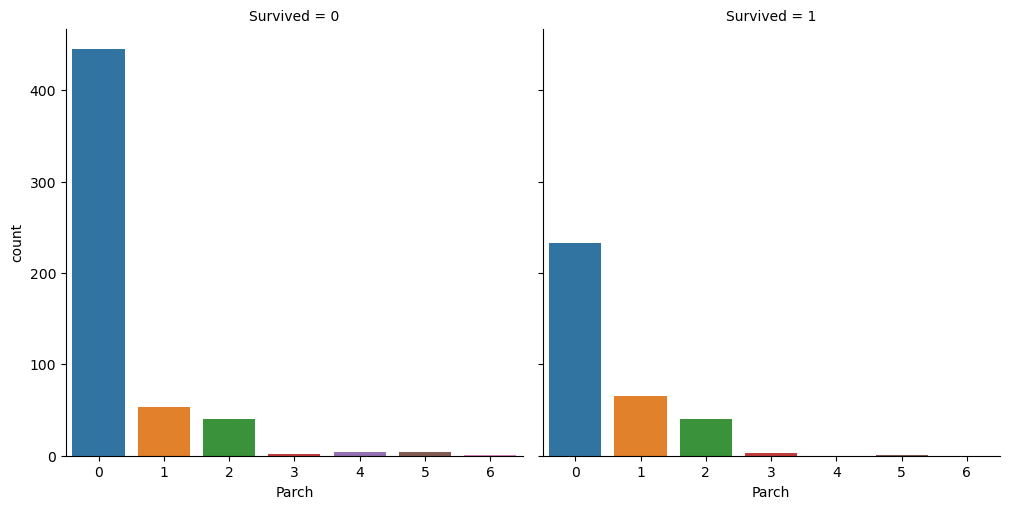

In [7]:
sns.catplot(x = 'Parch', col = 'Survived', kind = 'count', data = titanic_df)
plt.show()

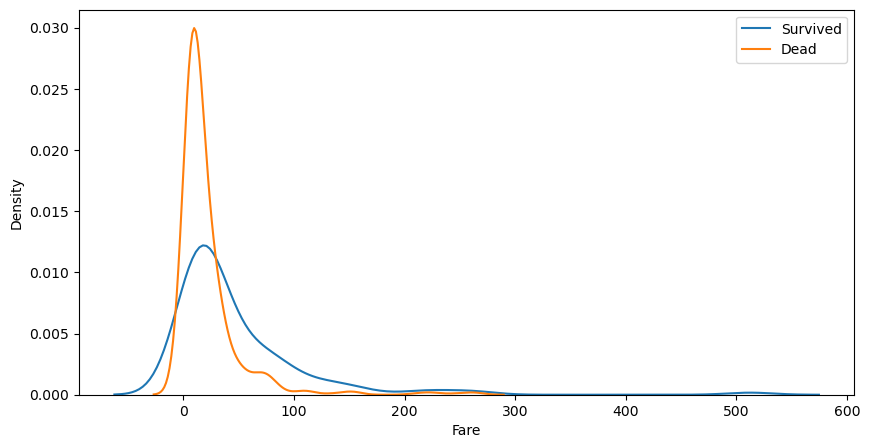

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x = titanic_df[titanic_df['Survived'] == 1]['Fare'], ax=ax)
sns.kdeplot(x = titanic_df[titanic_df['Survived'] == 0]['Fare'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.show()

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### About this dataset

id: 데이터 고유 id

age: 나이

sex: 성별 (여자 = 0, 남자 = 1)

cp: 가슴 통증(chest pain) 종류 

    0 : asymptomatic 무증상
    1 : atypical angina 일반적이지 않은 협심증
    2 : non-anginal pain 협심증이 아닌 통증
    3 : typical angina 일반적인 협심증

trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)

chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)

fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)

restecg: (resting electrocardiographic) 휴식 중 심전도 결과 

    0: showing probable or definite left ventricular hypertrophy by Estes' criteria
    1: 정상
    2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    
thalach: (maximum heart rate achieved) 최대 심박수

exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)

oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강

slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기

    0: downsloping 하강
    1: flat 평탄
    2: upsloping 상승
ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 
Null 값은 숫자 4로 인코딩됨 

thal: thalassemia 지중해빈혈 여부

    0 = Null 
    1 = normal 정상
    2 = fixed defect 고정 결함
    3 = reversable defect 가역 결함
target: 심장 질환 진단 여부

    0: < 50% diameter narrowing
    1: > 50% diameter narrowing

### 가설설정: 

1. 혈중 콜레스테롤(chol)이 높은 사람들 심장질환에 걸릴확률이 높을 것이다.

2. 최대 심박수(thalach)가 높은 사람들 심장질환에 걸릴확률이 높을 것이다.

3. exang(활동으로 인한 협심증 여부)가 있는 사람들은 심장질환에 걸릴확률이 높을 것이다.

1. 데이터 불러오기

In [20]:
heart = pd.read_csv('./heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


종속변수 값 분포 살펴보기

In [35]:
heart['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

데이터 정보 확인

In [21]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1. 혈중 콜레스테롤(chol)이 높은 사람들 심장질환에 걸릴확률이 높을 것이다.

=> **그렇지 않다!** 오히려 콜레스테롤이 높은 사람들이 더 안전했다.

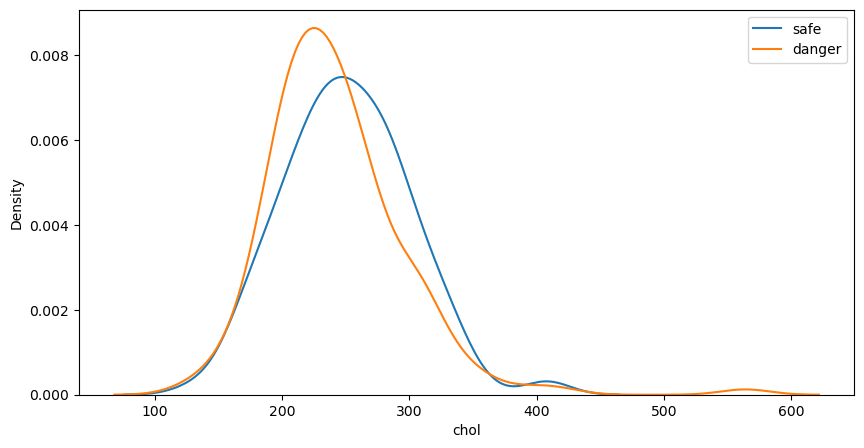

In [36]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x = heart[heart['output'] == 0]['chol'], ax=ax)
sns.kdeplot(x = heart[heart['output'] == 1]['chol'], ax=ax)
plt.legend(['safe', 'danger'])
plt.show()

가슴에 통증을 가지고 있을 수록 심장질환을 가질 확률이 높았다.

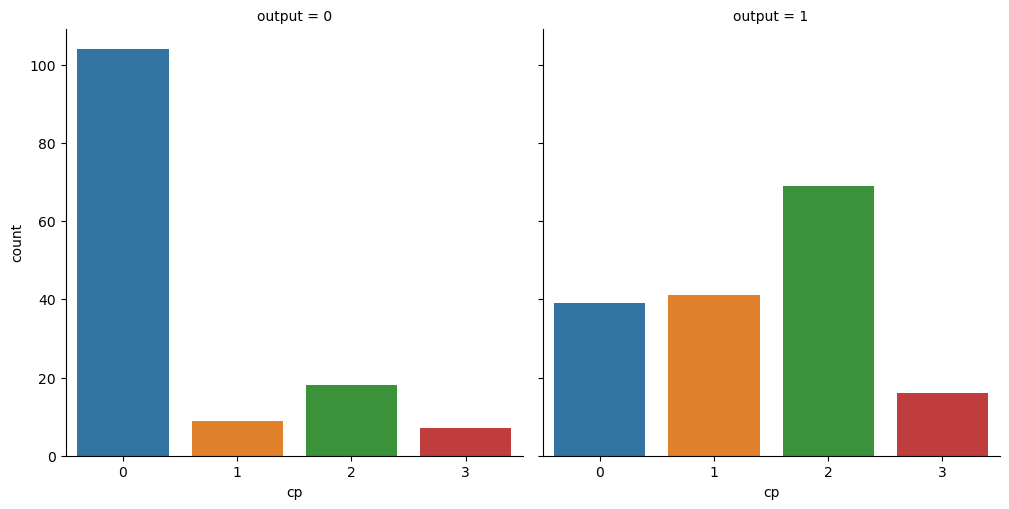

In [40]:
sns.catplot(x = 'cp', col = 'output', kind = 'count', data = heart)
plt.show()

2. 최대 심박수(thalach)가 높은 사람들 심장질환에 걸릴확률이 높을 것이다.

-> 그러한 것으로 나타났다.

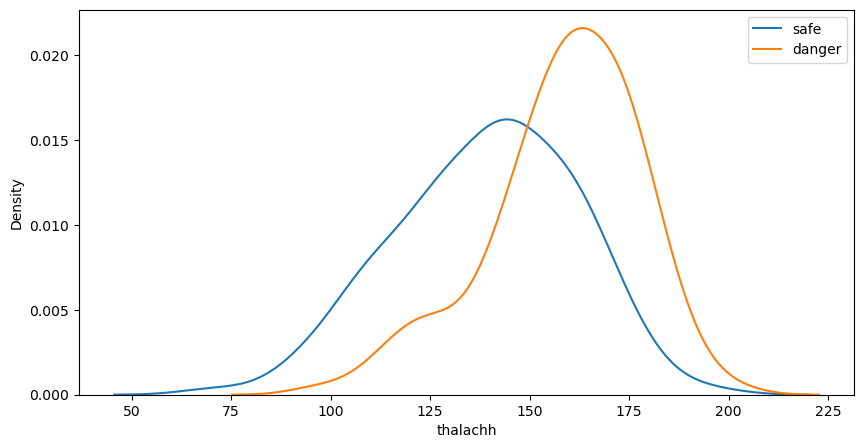

In [27]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x = heart[heart['output'] == 0]['thalachh'], ax=ax)
sns.kdeplot(x = heart[heart['output'] == 1]['thalachh'], ax=ax)
plt.legend(['safe', 'danger'])
plt.show()

# 심장병을 가지고 있는 사람들이 전반적으로 높은 최대 심박수를 가지고 있는것으로 보인다.

3. exang(활동으로 인한 협심증 여부)가 있는 사람들은 심장질환에 걸릴확률이 높을 것이다.
-> 그렇지 않다. 오히려 활동으로 인한 협심증 여부가 없는 사람들이 더 심장병에 걸릴 확률이 높았다!

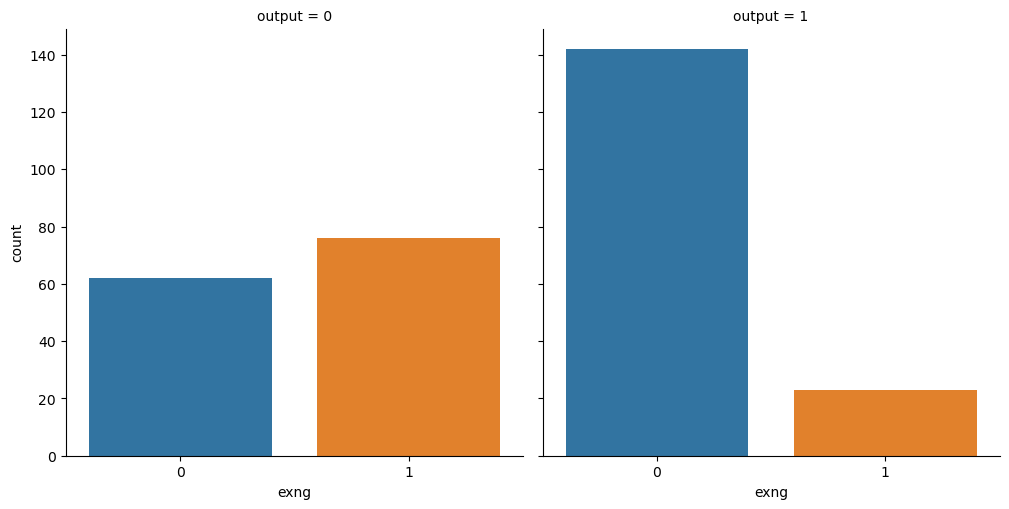

In [38]:
sns.catplot(x = 'exng', col = 'output', kind = 'count', data = heart)
plt.show()


지중해 빈혈을 가지고 있는사람들(thall =2,3)이 심장질환을 가지고 있는 사람들에게서 더 많이 관측된다.

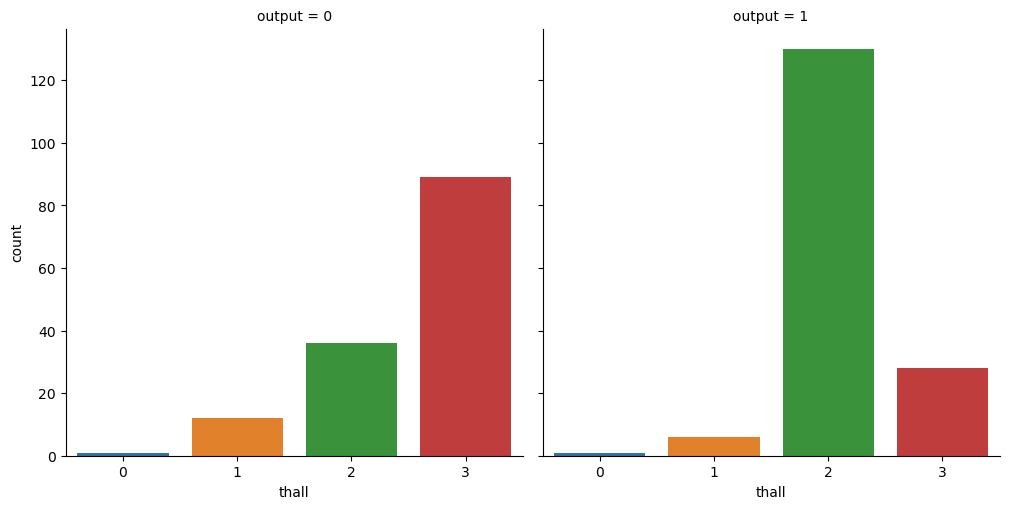

In [41]:
sns.catplot(x = 'thall', col = 'output', kind = 'count', data = heart)
plt.show()

결론: 심장질환에 관련있는 유의미한 feature: **cp(가슴에 통증여부), thall(지중해 빈혈여부), thalachh(최대 심박수)**